# Аугментация. ООП.

Аугментация (от англ. "augment" - "расширять") - это процесс увеличения размера выборки за счет преобразования имеющихся изображений. Например, одним из самых простых способов аугментации является зеркальное отображение картинки. Таким образом, можно из N картинок получить 2\*N изображений.

<tr>
<td><img style="transform: scaleX(-1); width:30%" alt="Drawing" src="./imgs/puppy-dog.jpg " /></td>
<td><img style="width:30%" alt="Drawing" src="./imgs/puppy-dog.jpg" /></td>
</tr>

## Но сначала: как загрузить картинку?
Есть несколько способов считать изображение и представить его в виде массива пикселей (например, это может быть numpy массив). Рассмотрим каждый из них по порядку, импортировав перед этим пакет matplotlib.pyplot, который поможет выводить массив пикселей в виде изображения. Строка "%matplotlib inline" - указывает jupyter notebook-у выводить изображения сразу под ячейкой, в которой используется matplotlib (это позволяет нам не писать явно plt.show( ) в каждой ячейке).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

### OpenCV

In [2]:
import cv2

In [3]:
img = cv2.imread('./imgs/raccoon.jpg')
print(type(img), img.shape)

<class 'numpy.ndarray'> (400, 640, 3)


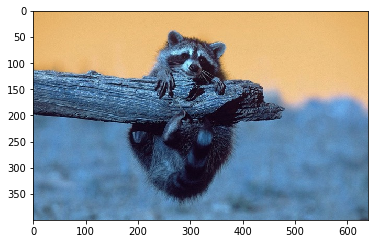

In [4]:
plt.imshow(img)

По умолчанию, openCV предполагает, что каналы в картинке расположены в порядке Blue Green Red, поэтому изображение выглядит не естественно. Чтобы конвертировать картинку из BGR в RGB, воспользуемся функцией cv2.cvtColor( )

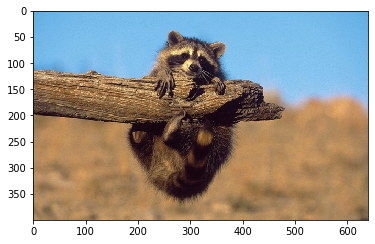

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### PIL.Image

In [6]:
import PIL
import numpy as np

In [7]:
pil_img = PIL.Image.open('./imgs/raccoon.jpg')
print(type(pil_img), img.shape)

<class 'PIL.JpegImagePlugin.JpegImageFile'> (400, 640, 3)


Плюс PIL.Image изображений в том, что их можно отобразить при помощи встроенной функции display, сохраняя исходный размер изображения.

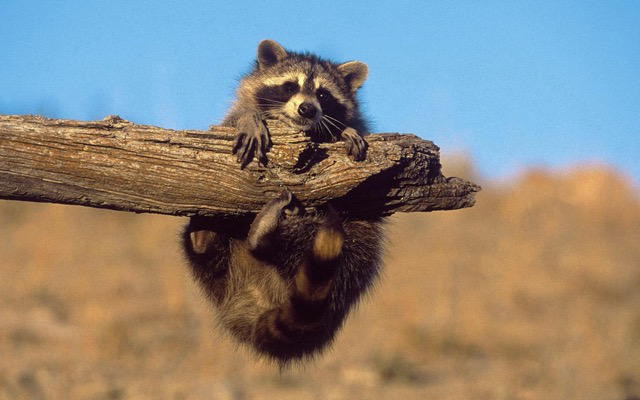

In [8]:
display(pil_img)

Но функци plt.imshow( ) также может принимать PIL картинку, но размер изображения, возможно, придется корректировать.

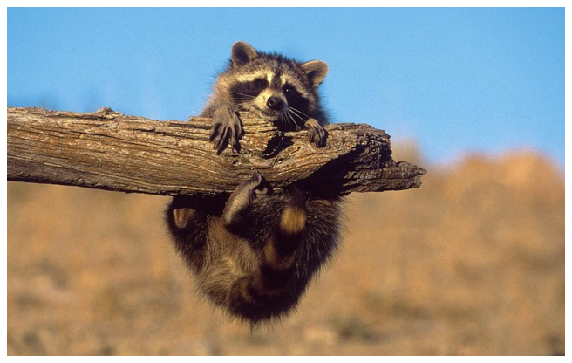

In [9]:
plt.figure(figsize=(10, 16)) # изменим размер графического окна
plt.imshow(pil_img)
plt.axis('off'); # удалим ось Х и ось У

Конвертировать PIL изображение в numpy.ndarray можно при помощи функции np.asarray( )

In [10]:
img = np.asarray(pil_img)
print(type(img), img.shape)

<class 'numpy.ndarray'> (400, 640, 3)


---

## Аугментация

### pytorch transforms

In [11]:
import torch
from torchvision.transforms import (Compose, RandomAffine, RandomVerticalFlip, ToTensor)

In [12]:
rotate_aug = RandomAffine(degrees=45, fillcolor=(255, 255, 0))

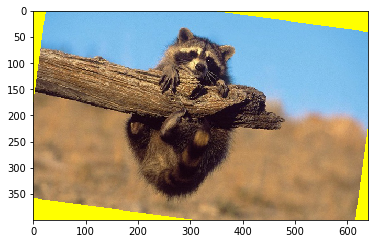

In [13]:
auged_img = rotate_aug(pil_img)
plt.imshow(auged_img)

In [14]:
type(auged_img)

PIL.Image.Image

### albumentations
[github репозиторий](https://github.com/albu/albumentations)

In [15]:
import albumentations as alb

In [16]:
brightness_aug = alb.RandomBrightness(limit=0.5, always_apply=False, p=0.5)

In [17]:
brutal_aug = alb.Compose([
    alb.RandomBrightness(limit=0.5, always_apply=False, p=1),
    alb.JpegCompression(quality_lower=5, quality_upper=10, p=0.1)
])

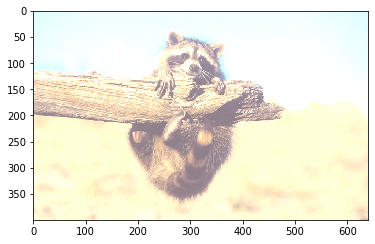

In [18]:
auged_img = brutal_aug(image=img)['image']
plt.imshow(auged_img)

### imgaug
[github репозиторий](https://github.com/aleju/imgaug)

In [19]:
import imgaug.augmenters as iaa

In [20]:
coarse_dropout_aug = iaa.CoarseDropout(p=0.9, size_percent=0.5, per_channel=True)

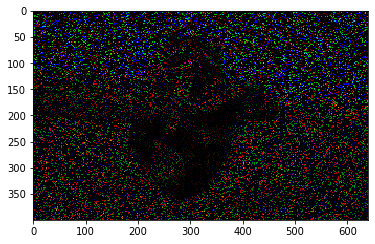

In [21]:
auged_img = coarse_dropout_aug.augment_image(img)
plt.imshow(auged_img)

---
## ООП

### Синтетический пример

In [22]:
class Human():
    def __init__(self, name, surname):
        self.name = name
        self.surname = surname
        
    def throw_away(self, meters):
        print(self.name, self.surname)
        print('|', '-' * meters, '_')
        

In [23]:
person_01 = Human('Anton', 'Anisimov')
person_02 = Human('Petr', 'Kuzmin')

In [24]:
person_01.surname

'Anisimov'

In [25]:
person_01.throw_away(10)

Anton Anisimov
| ---------- _


### Свой класс для аугментации
Создадим свой класс для аугментации, который будет включать в себя все три приведенных выше библиотеки и иметь API сходное с torchvision.transforms.

API - (Application Programming Interface - программный интерфейс программирования) это в каком-то смысле синоним слову "протокол". АПИ (как говорят программисты из России) - определяет функционал приложения или класса. Вот как в контексте общения двух программистов используется понятие АПИ:

-(П1): Я хочу чтобы ты написал скрипт, в котором есть функция summ(array), которая принимает на вход список или numpy массив, а на выходе возвращает число, которое является суммой всех элементов

-(П2): Принято, сделаю

In [26]:
# Дома: 
# Измените класс таким образом, чтобы во время инициализации вы могли бы передать
# список с аугментациями, и список с вероятностями их применения. Тогда придется
# поменять метод "prob_augment_image", чтобы указанные аугментации применялись по
# очереди.

import numpy as np

class MyAUG():
    def __init__(self, aug):
        self.aug = aug
        
    def prob_augment_image(self, img, prob):
        p = np.random.rand()
        if p < prob:
            img = self.aug.augment_image(img)
            
        return img

In [27]:
my_aug = MyAUG(coarse_dropout_aug)

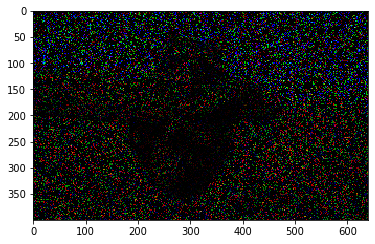

In [28]:
auged_img = my_aug.prob_augment_image(img, 0.5)
plt.imshow(auged_img)